# Bank Marketing Data Analysis and Classification

# 0.The Dataset

Age

Job

Marital Status

Education

Default: Having a previously broken credit

Balance: Balance of the individual.

Housing: Any housing loan

Loan: Any personal Loan

Contact: Contact communication type

Month: Last month of contact

Day: The day of the contacted

Duration: Talk time on last call(Unit: Sec)

Campaign: The number of contacts reaching the customer during the current campaign

Pdays: The number of days since the previous campaign, if reached (-1 if it was never reached before)

Previous: The number of contacts that reached the customer before this campaign

Poutcome: Previous campaign success, failure or failure

Deposit: Client subscribed a term deposit

# 1.Exploratory data analysis 

In [52]:
import numpy as np
import pandas as pd 
import copy
# conda install -c https://conda.anaconda.org/plotly plotly
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from datetime import date
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,auc,roc_curve
# from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [53]:
df = pd.read_csv('/Users/genghua/Desktop/Data/bank.csv')

In [54]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [55]:
df.shape

(11162, 17)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [57]:
# check missing value
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [58]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [59]:
df.describe(include = 'object')


,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


In [60]:
# Check data is balance or not
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [61]:
# Check data is balance or not

# ndf = df.loc[(df['poutcome'] != "unknown") & (df['poutcome'] != "other")]
# print(df.shape, ndf.shape)

In [62]:
counts = df.deposit.value_counts()
normal = counts[0]
Churn = counts[1]
perc_normal = (normal/(normal+Churn))*100
perc_Churn = (Churn/(normal+Churn))*100
print('There were {} non-Churn ({:.3f}%) and {} Churn ({:.3f}%).'.format(normal, perc_normal, Churn, perc_Churn))

There were 5873 non-Churn (52.616%) and 5289 Churn (47.384%).


In [63]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [64]:
# df.age.value_counts()/ len(df.age)*100
# df.job.value_counts()/ len(df.job)*100
# df.marital.value_counts()/ len(df.marital)*100
# df.education.value_counts()/ len(df.education)*100
# df.default.value_counts()/ len(df.default)*100
# df.loan.value_counts()/ len(df.loan)*100
# df.contact.value_counts()/ len(df.contact)*100
# df.month.value_counts()/ len(df.month)*100
# df.poutcome.value_counts()/ len(df.duration)*100
# df.deposit.value_counts()/ len(df.duration)*100


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e63ce8d50>,
      dtype=object)

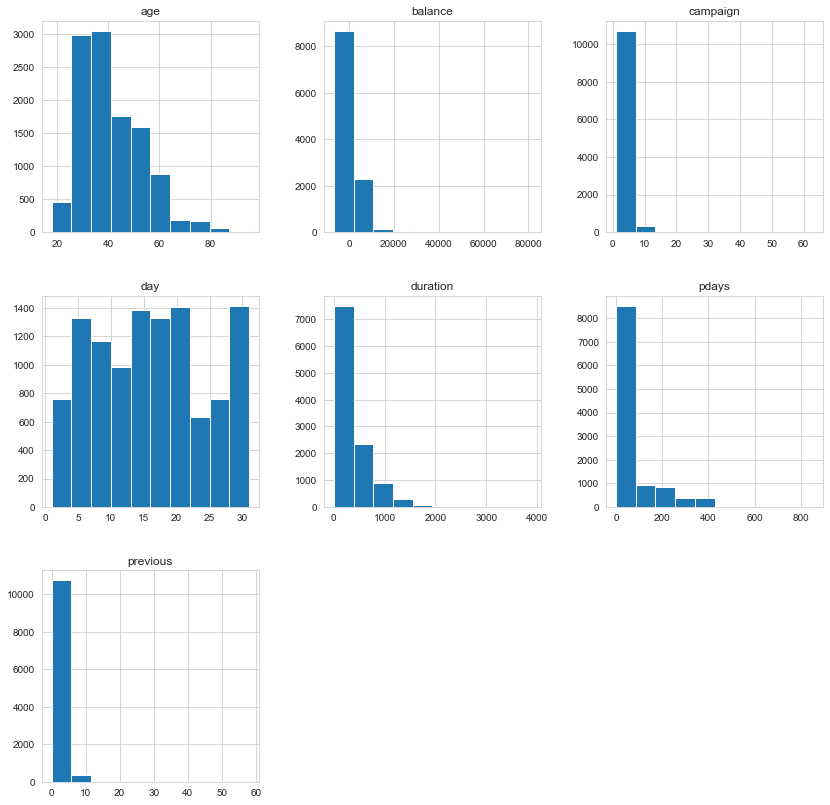

In [65]:
df.hist(figsize=(14,14)) 

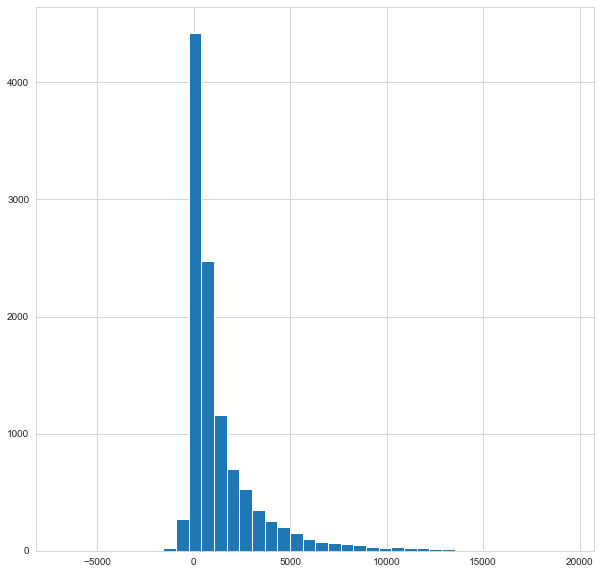

In [66]:
bal_his = df.loc[(df['balance'] < 20000)]
bal_his['balance'].hist(figsize=(10,10), bins = 40)

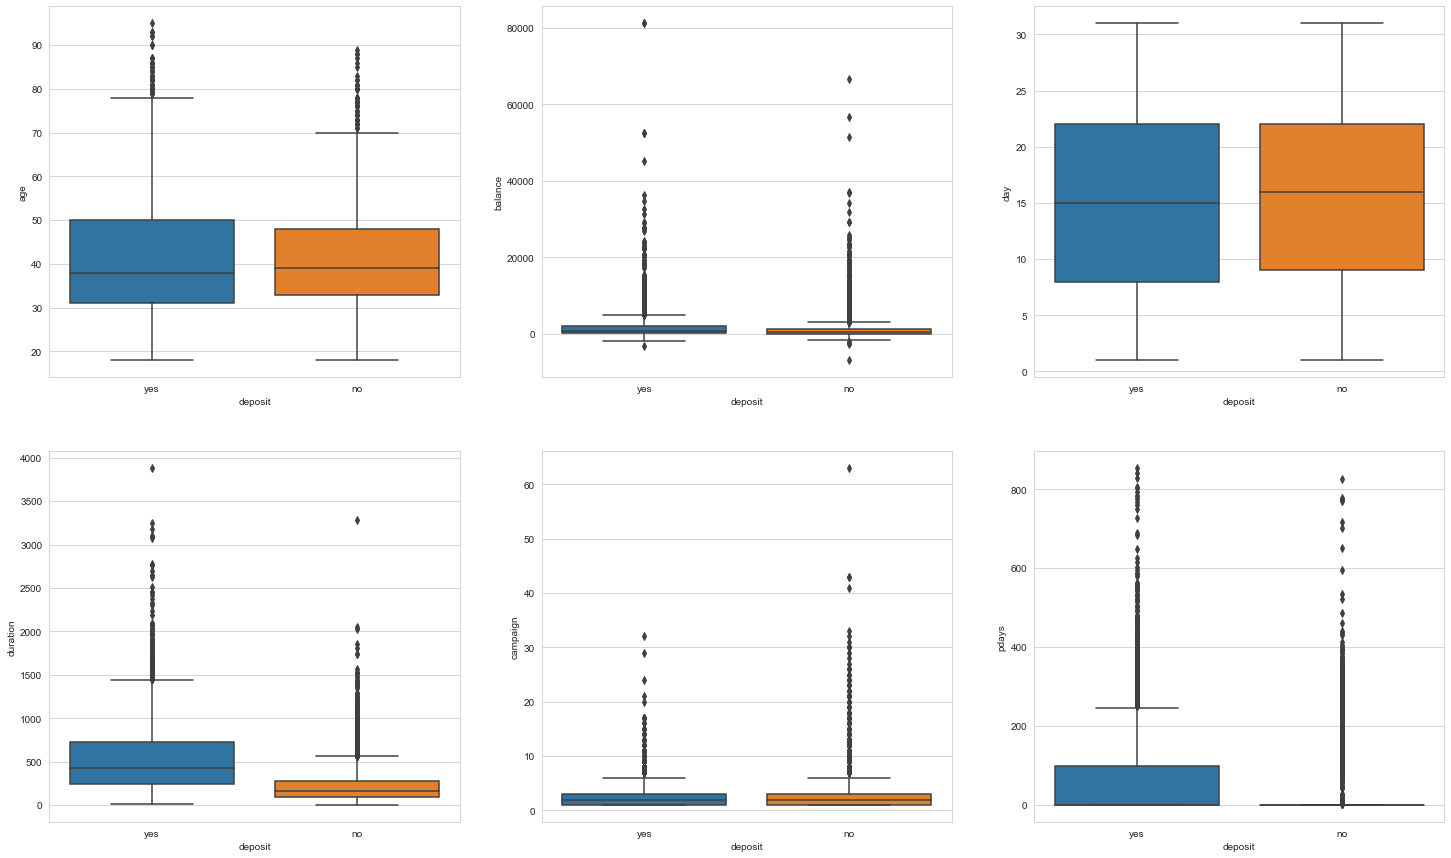

In [67]:
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,15))

sns.boxplot(x="deposit", y="age", data=df, ax=axes[0,0])
sns.boxplot(x="deposit", y="balance", data=df, ax=axes[0,1])
sns.boxplot(x="deposit", y="day", data=df, ax=axes[0,2])
sns.boxplot(x="deposit", y="duration", data=df, ax=axes[1,0])
sns.boxplot(x="deposit", y="campaign", data=df, ax=axes[1,1])
sns.boxplot(x="deposit", y="pdays", data=df, ax=axes[1,2])




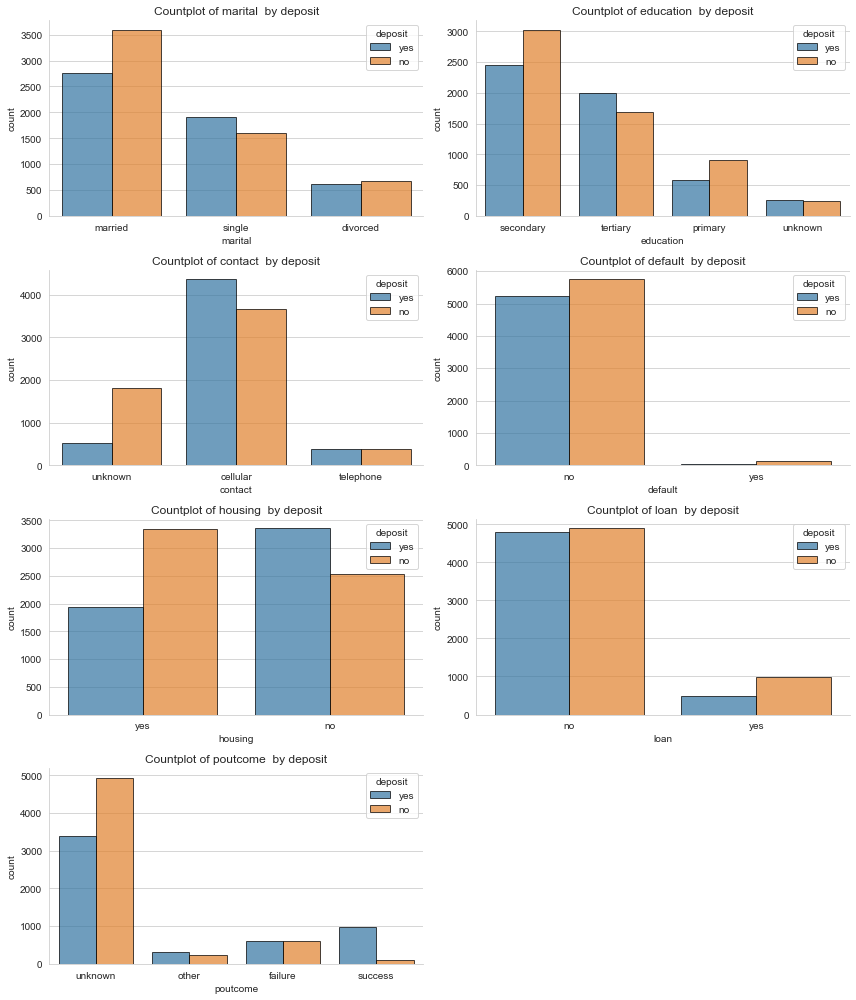

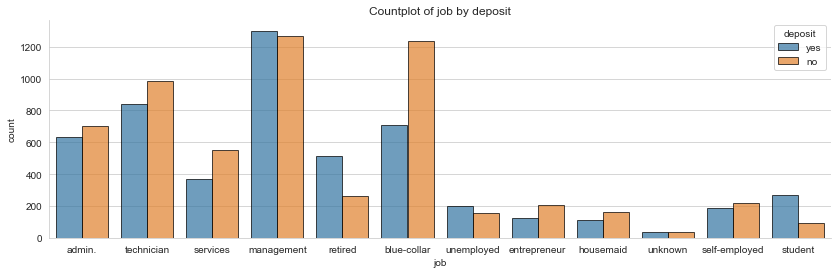

In [68]:
plt.figure(figsize=[12,14])
features=["marital", "education", "contact", "default", "housing", "loan", "poutcome"]
n=1
for f in features:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='deposit', edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("Countplot of {}  by deposit".format(f))
    n=n+1
plt.tight_layout()
plt.show()


    
plt.figure(figsize=[14,4])
sns.countplot(x='job', hue='deposit',edgecolor="black", alpha=0.7, data=df)
sns.despine()
plt.title("Countplot of job by deposit")
plt.show()

(7, 0)

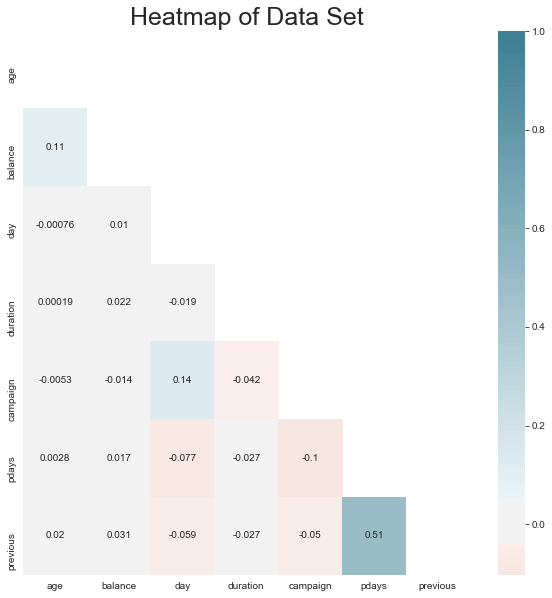

In [69]:
sns.set_style('whitegrid')
plt.subplots(figsize = (10,10))
## Plotting heatmap. Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of Data Set", fontsize = 25);
ax.get_ylim()
# output: (6.5, 0.5)
ax.set_ylim(7,0)

# 2.Converting Categorical Columns to Numeric Columns

In [70]:
# columns=df.select_dtypes(include=[object]).columns
# df=pd.concat([df,pd.get_dummies(df[columns])],axis=1)
# df=df.drop(df['job','marital','education','default','housing','loan','contact','month','day','poutcome'],axis=1)
df = df.replace(to_replace ="yes", value =1) 
df = df.replace(to_replace ="no", value =0) 

In [71]:
df.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit       int64
dtype: object

In [72]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,0,1,1,0,cellular,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,secondary,0,733,0,0,unknown,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,secondary,0,29,0,0,cellular,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,secondary,0,0,0,1,cellular,8,may,9,2,172,5,failure,0


(11, 0)

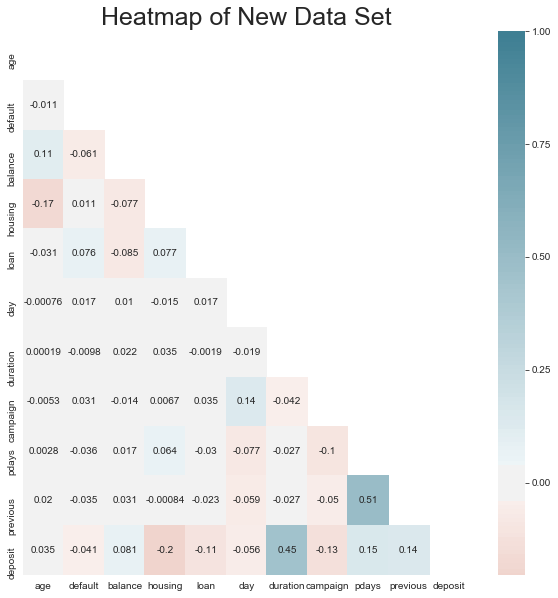

In [73]:
sns.set_style('whitegrid')
plt.subplots(figsize = (10,10))
## Plotting heatmap. Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of New Data Set", fontsize = 25);
ax.get_ylim()
# output: (10.5, 0.5)
ax.set_ylim(11,0)

In [74]:
# df_train=copy.deepcopy(df)
cols=np.array(df.columns[df.dtypes != object])
df.dtypes
# cols
# for i in df_train.columns:
#     if i not in cols:
#         df_train[i]=df_train[i].map(str)
# df_train.drop(columns=cols,inplace=True)

# df_train.head(5)

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit       int64
dtype: object

In [75]:
# import random
# # random.seed(2)
# cols=np.array(df.columns[df.dtypes != object])


# d = defaultdict(LabelEncoder)

# df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
# df_train[cols] = df[cols]

# df_train.head(5)

In [76]:
df_train = df.copy()
df_train = pd.get_dummies(df_train, columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome'])
df_train
df_train.dtypes

age                    int64
default                int64
balance                int64
housing                int64
loan                   int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
deposit                int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
contact_cellular       uint8
contact_telephone      uint8
contact_unknown        uint8
month_apr              uint8
month_aug     

In [77]:
# sns.set_style('whitegrid')
# plt.subplots(figsize = (20,20))
# ## Plotting heatmap. Generate a mask for the upper triangle (taken from seaborn example gallery)
# mask = np.zeros_like(df_train.corr(), dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# ax = sns.heatmap(df_train.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
# plt.title("Heatmap of All Data Set", fontsize = 25);
# ax.get_ylim()
# output: (16.5, 0.5)
# ax.set_ylim(17,0)

# 3.Feature Selection

In [78]:
corr = df_train.corr()
a = corr.sort_values(["deposit"], ascending = False, inplace = True)


print(corr.deposit)


deposit                1.000000
duration               0.451919
poutcome_success       0.286642
contact_cellular       0.223252
pdays                  0.151593
previous               0.139867
month_mar              0.135438
month_oct              0.133783
month_sep              0.126901
job_retired            0.103827
job_student            0.099953
marital_single         0.094632
education_tertiary     0.094598
month_apr              0.090975
month_dec              0.086964
balance                0.081129
month_feb              0.051710
poutcome_other         0.044059
job_management         0.036301
age                    0.034901
job_unemployed         0.033487
poutcome_failure       0.020714
contact_telephone      0.016420
education_unknown      0.014355
marital_divorced       0.005228
job_unknown            0.001889
job_admin.            -0.000610
job_self-employed     -0.004707
job_technician        -0.011557
month_aug             -0.016621
month_jun             -0.018982
month_ja

In [79]:
c = corr[['deposit']]
c
d = corr['deposit'].loc[(corr['deposit'].abs() > 0.1)]
print(d)
type(d)
list(d.index)

deposit             1.000000
duration            0.451919
poutcome_success    0.286642
contact_cellular    0.223252
pdays               0.151593
previous            0.139867
month_mar           0.135438
month_oct           0.133783
month_sep           0.126901
job_retired         0.103827
job_blue-collar    -0.100840
loan               -0.110580
campaign           -0.128081
month_may          -0.170507
housing            -0.203888
poutcome_unknown   -0.230470
contact_unknown    -0.256136
Name: deposit, dtype: float64


['deposit',
 'duration',
 'poutcome_success',
 'contact_cellular',
 'pdays',
 'previous',
 'month_mar',
 'month_oct',
 'month_sep',
 'job_retired',
 'job_blue-collar',
 'loan',
 'campaign',
 'month_may',
 'housing',
 'poutcome_unknown',
 'contact_unknown']

In [80]:
df_g1 = df_train[['deposit', 'duration', 'poutcome_success', 'contact_cellular', 
                  'pdays', 'previous', 'month_mar', 'month_oct', 'month_sep', 'job_retired', 'loan',
                 'campaign', 'month_may', 'housing', 'poutcome_unknown', 'contact_unknown']]

In [101]:
df_g2 = df_train[list(d.index)]
df_g2

,deposit,duration,poutcome_success,contact_cellular,pdays,previous,month_mar,month_oct,month_sep,job_retired,job_blue-collar,loan,campaign,month_may,housing,poutcome_unknown,contact_unknown
0,1,1042,0,0,-1,0,0,0,0,0,0,0,1,1,1,1,1
1,1,1467,0,0,-1,0,0,0,0,0,0,0,1,1,0,1,1
2,1,1389,0,0,-1,0,0,0,0,0,0,0,1,1,1,1,1
3,1,579,0,0,-1,0,0,0,0,0,0,0,1,1,1,1,1
4,1,673,0,0,-1,0,0,0,0,0,0,0,2,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0,257,0,1,-1,0,0,0,0,0,1,0,1,0,1,1,0
11158,0,83,0,0,-1,0,0,0,0,0,0,0,4,0,0,1,1
11159,0,156,0,1,-1,0,0,0,0,0,0,0,2,0,0,1,0
11160,0,9,0,1,172,5,0,0,0,0,0,1,2,1,0,0,0


(17, 0)

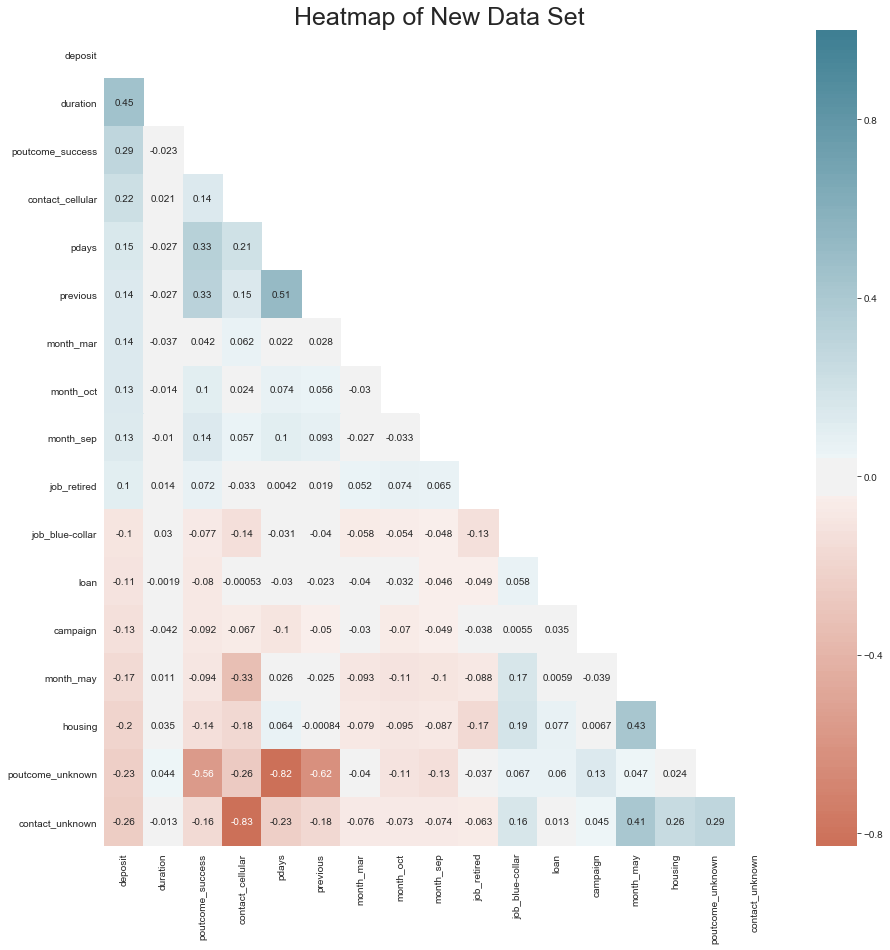

In [105]:
sns.set_style('whitegrid')
plt.subplots(figsize = (15,15))
## Plotting heatmap. Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_g2.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(df_g2.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of New Data Set", fontsize = 25);
ax.get_ylim()
# output: (10.5, 0.5)
ax.set_ylim(17,0)

In [83]:
# df_train.drop(columns = ['job_unknown'])

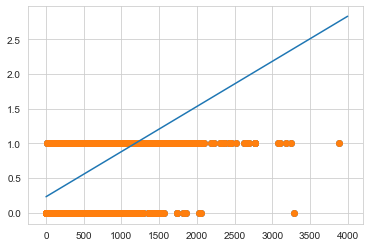

In [84]:
x = df_train.duration
y = df_train.deposit
plt.scatter(x, y)
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 4000, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)

In [85]:
train, test = train_test_split(df_train, test_size=0.3, random_state=42, shuffle=True)
print(train.shape, test.shape)

(7813, 49) (3349, 49)


In [86]:
train.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,...,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.237169,0.014335,1536.787278,0.467938,0.133495,15.605273,369.986433,2.499552,49.952643,0.802253,...,0.109177,0.024318,0.252400,0.087290,0.036094,0.029566,0.108665,0.045565,0.094714,0.751056
std,11.850243,0.118876,3215.999050,0.499003,0.340131,8.419817,345.882463,2.722798,107.826919,2.135139,...,0.311881,0.154046,0.434417,0.282278,0.186535,0.169398,0.311238,0.208553,0.292838,0.432429
min,18.000000,0.000000,-3058.000000,0.000000,0.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,124.000000,0.000000,0.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,0.000000,553.000000,0.000000,0.000000,15.000000,253.000000,2.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,0.000000,1730.000000,1.000000,0.000000,21.000000,492.000000,3.000000,-1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,1.000000,81204.000000,1.000000,1.000000,31.000000,3881.000000,63.000000,854.000000,41.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
test.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,...,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000
mean,41.219767,0.016721,1509.294715,0.485219,0.124515,15.781129,376.676918,2.529113,54.544640,0.903255,...,0.110182,0.025679,0.254404,0.077934,0.032846,0.026277,0.113168,0.054046,0.098835,0.733950
std,12.061128,0.128245,3247.670769,0.499856,0.330217,8.422863,350.024934,2.720690,110.850401,2.620721,...,0.313163,0.158200,0.435591,0.268107,0.178259,0.159980,0.316845,0.226142,0.298486,0.441956
min,18.000000,0.000000,-6847.000000,0.000000,0.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,118.000000,0.000000,0.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,546.000000,0.000000,0.000000,15.000000,259.000000,2.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,0.000000,1644.000000,1.000000,0.000000,22.000000,503.000000,3.000000,85.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,93.000000,1.000000,81204.000000,1.000000,1.000000,31.000000,3284.000000,43.000000,842.000000,58.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
def Definedata():
    # define dataset
    X=df_train.drop(columns=['deposit']).values
    y=df_train['deposit'].values
    return X, y

In [89]:
def Models_NO(models, graph):
    
    import pdb
    
    model = models
    X, y = Definedata()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)
    print(y_train.sum())
    if graph:
        train_matrix = pd.crosstab(y_train, model.predict(X_train), rownames=['Actual'], colnames=['Predicted'])    
        test_matrix = pd.crosstab(y_test, model.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
        matrix = pd.crosstab(y, model.predict(X), rownames=['Actual'], colnames=['Predicted'])
    
        f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(15, 2))
    
        g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False,annot_kws={"size": 18},ax=ax1)
        g1.set_title(title)
        g1.set_ylabel('Total Deposit = {}'.format(y_train.sum()), fontsize=14, rotation=90)
        g1.set_xlabel('Accuracy for TrainSet: {}'.format(accuracy_score(model.predict(X_train), y_train)))
        g1.set_xticklabels(['Deposit','No Deposit'],fontsize=12)

        g2 = sns.heatmap(test_matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 18},ax=ax2)
        g2.set_title(title)
        g2.set_ylabel('Total Deposit = {}'.format(y_test.sum()), fontsize=14, rotation=90)
        g2.set_xlabel('Accuracy for TestSet: {}'.format(accuracy_score(y_pred, y_test)))
        g2.set_xticklabels(['Deposit','No Deposit'],fontsize=12)

        g3 = sns.heatmap(matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 18},ax=ax3)
        g3.set_title(title)
        g3.set_ylabel('Total Deposit = {}'.format( y.sum()), fontsize=14, rotation=90)
        g3.set_xlabel('Accuracy for TotalSet: {}'.format(accuracy_score(y_total, y)))
        g3.set_xticklabels(['Deposit','No Deposit'],fontsize=12)
        g3.set_ylim(2,0)
#         g3.set_xlim(1)
        plt.show()
#         print ("")
#         print ("Classification Report: ")
#         print (classification_report(y, y_total))
        #pdb.set_trace()
    else:
        print("\t\tError Table")
        print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, (y_pred)))
        print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, (y_pred) ))
        print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, (y_pred) )))
        print('Accuracy on Traing set   : ', model.score(X_train,y_train))
        print('Accuracy on Testing set  : ', model.score(X_test,y_test))
        print('Accuracy on Testing set  : ', accuracy_score(y_pred, y_test))
#         print('Accuracy on Testing set  : ', accuracy_score(y_total, y))
        print('AUC score                :', roc_auc_score(y, y_total)*100,'%')    
        #pdb.set_trace()
    return y_total, y

3691


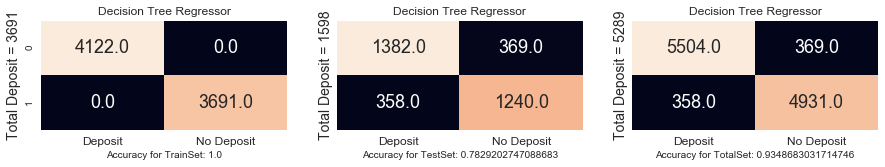

In [90]:
title = 'Decision Tree Regressor'
y_predict, y_test = Models_NO(DecisionTreeRegressor(), True)

3691
		Error Table
Mean Absolute Error      :  0.22096148103911614
Mean Squared  Error      :  0.22096148103911614
Root Mean Squared  Error :  0.4700654008104789
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.11430550323827116
Accuracy on Testing set  :  0.7790385189608838
AUC score                : 93.34370539306866 %


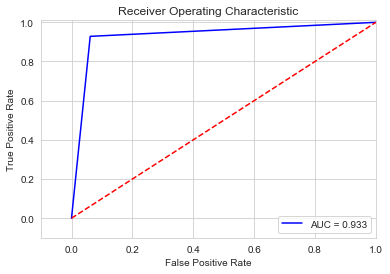

In [91]:
y_predicted, y_actual = Models_NO(DecisionTreeRegressor(), False)
fpr, tpr, thresholds = roc_curve(y_actual, y_predicted)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

3691


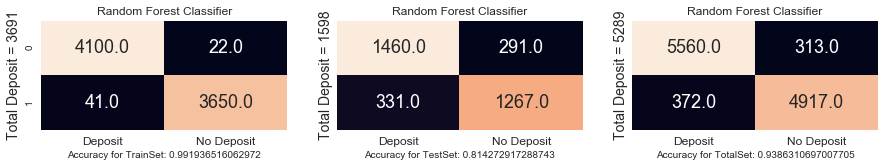

In [92]:
title = 'Random Forest Classifier'
y_predict, y_test = Models_NO(RandomForestClassifier(), True)

3691
		Error Table
Mean Absolute Error      :  0.19408778739922364
Mean Squared  Error      :  0.19408778739922364
Root Mean Squared  Error :  0.44055395515103896
Accuracy on Traing set   :  0.9923204914885447
Accuracy on Testing set  :  0.8059122126007764
Accuracy on Testing set  :  0.8059122126007764
AUC score                : 93.58595083937288 %


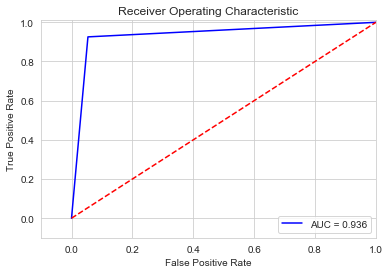

In [93]:
y_predicted, y_actual = Models_NO(RandomForestClassifier(), False)
fpr, tpr, thresholds = roc_curve(y_actual, y_predicted)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

3691


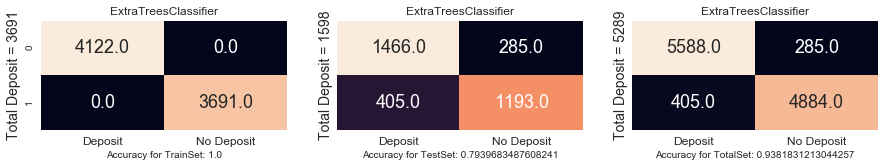

In [94]:
title = 'ExtraTreesClassifier'
y_predict, y_test = Models_NO(ExtraTreesClassifier(), True)

3691
		Error Table
Mean Absolute Error      :  0.21379516273514482
Mean Squared  Error      :  0.21379516273514482
Root Mean Squared  Error :  0.4623798900635113
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.7862048372648551
Accuracy on Testing set  :  0.7862048372648551
AUC score                : 93.50666822868895 %


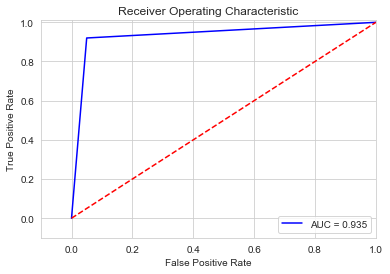

In [95]:
y_predicted, y_actual = Models_NO(ExtraTreesClassifier(), False)
fpr, tpr, thresholds = roc_curve(y_actual, y_predicted)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

3691


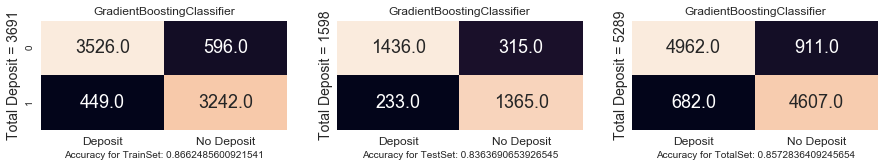

In [96]:
title = 'GradientBoostingClassifier'
y_predict, y_test = Models_NO(GradientBoostingClassifier(), True)

3691
		Error Table
Mean Absolute Error      :  0.16363093460734549
Mean Squared  Error      :  0.16363093460734549
Root Mean Squared  Error :  0.4045132069628203
Accuracy on Traing set   :  0.8662485600921541
Accuracy on Testing set  :  0.8363690653926545
Accuracy on Testing set  :  0.8363690653926545
AUC score                : 85.79682468427883 %


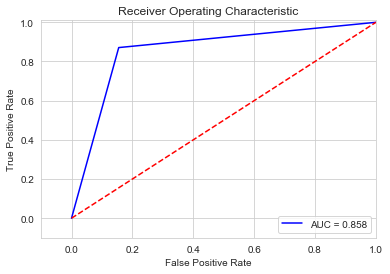

In [97]:
y_predicted, y_actual = Models_NO(GradientBoostingClassifier(), False)
fpr, tpr, thresholds = roc_curve(y_actual, y_predicted)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

3691


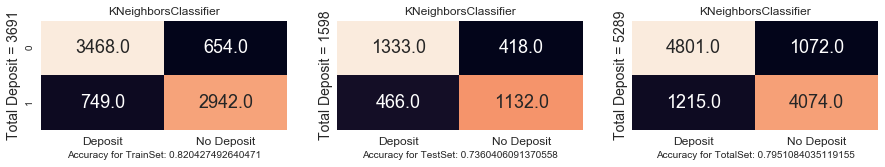

In [98]:
title = 'KNeighborsClassifier'
y_predict, y_test = Models_NO(KNeighborsClassifier(), True)

3691
		Error Table
Mean Absolute Error      :  0.2639593908629442
Mean Squared  Error      :  0.2639593908629442
Root Mean Squared  Error :  0.5137697839139085
Accuracy on Traing set   :  0.820427492640471
Accuracy on Testing set  :  0.7360406091370558
Accuracy on Testing set  :  0.7360406091370558
AUC score                : 79.3873856141418 %


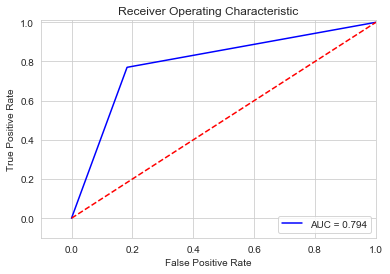

In [99]:
y_predicted, y_actual = Models_NO(KNeighborsClassifier(), False)
fpr, tpr, thresholds = roc_curve(y_actual, y_predicted)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()